Hw1, name: Jorge Monzon Diaz, email: jorgemd503@gmail.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt

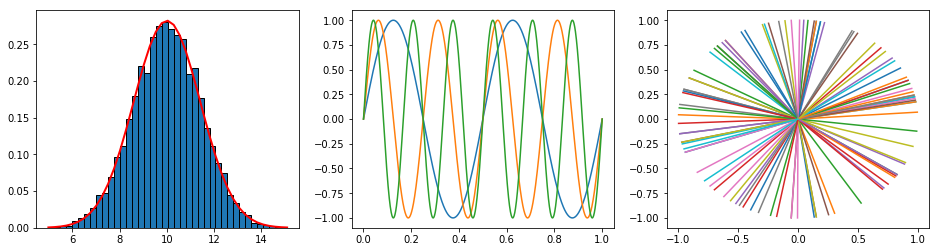

In [2]:

fig, ax = plt.subplots(1, 3,figsize=(16,4)) #create 3 subplots

## Problem 1a
mu=10 #declare mean and variance
variance=2
x = np.random.normal(mu, np.sqrt(variance), 10000) #create an array by samplying 10000 random normal variables
h,bins,color=ax[0].hist(x,40,ec='black',density=True) #store properties of array into 3 variables, this is needed to use and store automatically generated bins
y=1/(np.sqrt(2 * np.pi * variance)) * np.exp( - (bins - mu)**2 / (2 * variance) ) #make a linear line of normal distrbution using given mean and variance
ax[0].plot(bins, y, linewidth=2, color='r') #add linear line of (bins,y) to histogram (subplot 0)

## Problem 1b
dur=1
fs = 1000; 
t = np.linspace(0,dur,fs) #make time array of given duration with sample frequency
f=[2,4,6] #create array for different frequencies
for i in range(len(f)): #iterate through all numbers in frequency
    y = np.sin(2*np.pi*(f[i])*t) #equation of sine wave
    ax[1].plot(t,y) #plot t vs sin wave on subplot 1


#ax[2].hist(win[2,:],bins=2,density=True)

##Problem 2
theta=np.linspace(0,2*np.pi,360) #intialize theta with 360 intervals
randangles=theta[np.random.randint(0,360,100)] #create array of 100 random angles sampled from theta by randomly generating and passing 100 index values through theta
for i in range(len(randangles)): #iterate through all values of randangles
    ax[2].plot([0,np.cos(randangles[i])],[0,np.sin(randangles[i])]) #plot theta from ([0,x],[0,y]) on subplot 2

plt.show() #display plots

In [3]:
## Problem 2
#sum of first twin number using three nested for loop
sumt1=0 #start sum of first twin primes to 0
for i in range (0,3850): #runs though nums 0-1000
    if i>2: #to be prime, num must be at least 2
        
        for y in range(2,i): #check all num up to i
            if (i % y) == 0: #checks if i is divisible by any number up to i
                break #if number is not prime, end loop
                
        if (i%y!=0): #this part will only run if i was not divisble by a number less than i
            #checks if i+2 is also prime
            for y in range(2,i+2): #runs through numbers up to i + 2
                if ((i+2) % y) == 0: #checks if i+2 is divisible by any value up to i+1
                    break #if number is not prime, end loop
                    
            if ((i+2)%y)!=0: #this part will only run if i+2 was also not divisible
                sumt1+=i #since i and i+2 were both prime numbers, add the value of first twin to sum
                
print(sumt1)

163992


In [4]:
## Problem 2
#sum of first twin number using boolean vector and function for finding primes


def isPrime(i): #create a function to determine if a number is prime
    if i>2: #only check i>2 because of definiton of prime number
        for x in range(2,i):
            if i % x == 0: #if i was divisible by any number up to itself, return false
                return(False)
        return(True) #if number was not divisible by anything return true
    elif i == 2: #the first prime number by definition, always return true
        return True
    else: #you cannot have any prime numbers <2
        return False
    
    
primes=[] #initializes a boolean list for prime numbers
sumt1=0 #initializes variable that stores sum of first twin prime
for i in range (0,3850): #iterates through all numbers 0-1000
    primes.append(isPrime(i)) #for every ith entry in primes[i], assign either true if i is prime prime or false otherwise

for i in range(0,3850): #checks whether primes[i] and primes[i+2] were both prime
    if primes[i]== True and primes[i+2]== True:
        sumt1 += i #if they were both prime, add first twin to the sum
print (sumt1)

163992


In [5]:
##Problem 2
#vectorized computation of first twin prime sum

def isPrime(i): #create a function to determine if a number is prime
    if i>2: #only check i>2 because of definiton of prime number
        possdiv=np.arange(2,i) #make list of possible divisors
        if divisv(possdiv,i).any() == True: #if i was divisible by any number up to itself, return false
            return False
        return True #if number was not divisible by anything return true
    elif i == 2: #the first prime number by definition, always return true
        return True
    else: #you cannot have any prime numbers <2
        return False
    
def checkIndex(i): #function that finds twin primes and returns first twin or 0 if not a twin
    if primes[i]==True and primes[i+2]==True: #check primes array to see if i and i+2 were both primes
        return i #if true, return first prime, otherwise return 0
    else:
        return 0
    
def divis(divisors,i): #function that checks for divisibility
    if i % divisors == 0:
        return True #if number is divisible by given divisor, return True

i=np.arange(3850) #create list of values from 0-1000

#vectorize functions
isPrimev,checkIndexv,divisv=np.vectorize(isPrime),np.vectorize(checkIndex),np.vectorize(divis)

#make boolean array of prime numbers
primes=isPrimev(i)

#print sum of first twins using primes[]
print(sum(checkIndexv(i)))


163992


In [6]:
## Problem 2
#vectorization attempt 2

def firstTwins(i): #return i if number is first prime, 0 otherwise
    if i>2: #to be prime, num must be at least 2
        
        possdiv=np.arange(2,i) #make list of possible divisors
        if divisv(possdiv,i).any() == True: #if i was divisible by any number up to itself, return false
                return 0 #if number is not prime, end loop
                
        possdiv2=np.arange(2,i+2)
        if divisv(possdiv2,i+2).any() == True: #checks if i+2 is divisible by any value up to i+1
            return 0 #if number is not prime, end loop
                    
        return i #since i and i+2 were both prime numbers, add the value of first twin to sum
    else:
        return 0
                
def divis(divisors,i): #function that checks for divisibility
    if i % divisors == 0:
        return True
    else:
        return False

i=np.arange(3850) #create list from 0-1000
firsttwins=[] #initialize list of first twins

#vectorize functions
firstTwinsv,divisv=np.vectorize(firstTwins),np.vectorize(divis)

#make array of prime numbers of primes(i) in the form [0,0,2,3,0,5,.....] etc where numbers only get stored if prime
firsttwins=firstTwinsv(i)

#print sum of first twins using primes[]
print(sum(firsttwins))

163992


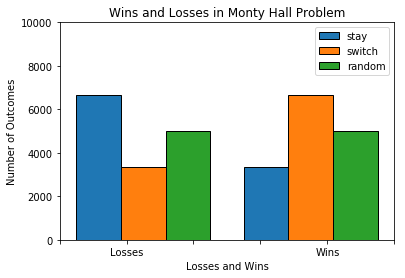

stay wins: 3362; switch wins: 6672; random wins: 5009


In [7]:
## Problem 3
#monty hall simulation and histogram

def stay(): #create a function that simulates staying with your initial pick
    #if your initial random guess matches initial random winning door, return true
    return np.random.randint(0,3) == np.random.randint(0,3)
    

def switch(): #create a function that simulates switching door choice
    doors=[False,False,False] #initialize boolean array of 3 doors
                              #false means door is not being used
    
    #winning door
    windoor=np.random.randint(0,3) #randomly generate winning door
    doors[windoor]=True #mark winning door as occupied in door array
    
    #your choice
    choice=np.random.randint(0,3) #randomly generate your initial pick
    doors[choice]=True #mark your door as occupied in door array
    
    #monty's pick
    falsedoors=[] #creates a list of avialable doors that monty can choose from
    for x in range(0,3): #checks all doors for availability
        if (doors[x]==False): #if door is not being used, save the door's index (x value) from doors[x]
            falsedoors.append(x)
    monty=falsedoors[np.random.randint(0,len(falsedoors))] #monty will randomly pick an available door from the list

    
    #switch door
    for x in range(0,3): #goes through all doors to find the door that's not your initial pick or monty's pick, then chooses it
        if (x!=monty) and (x!=choice):
            newdoor=x
            break #once you find the new door, end the loop
    
    return newdoor==windoor #returns true if your new pick is the winning door
    

win = [[],[],[]] #store wins and losses of staying technique (always keep initial pick)

for i in range(0,10000): #simulate 10000 games
    
    #run stay technique
    if stay()==True:
        win[0].append(1) #if you win add a 1 to winstay list
    else:
        win[0].append(0) #if you lose add a 0 to winstay list

    #run switch technique
    if switch()==True:
        win[1].append(1) #if you win add a 1 to winswitch list
    else:
        win[1].append(0)  #if you lose add a 0 to winswitch list

    #run random technique
    if (np.random.randint(0,2)==True): #randomly generate 1 or 0. if you roll 1, use stay technique
        if stay()==True: #if you win using stay add a 1 to winrand list
            win[2].append(1)
        else: #if you lose using stay add a 0 to winrand list
            win[2].append(0)
    else: #if you rolled 0, use switch technique
        if switch()==True: #if you win using switch add a 1 to winrand list
            win[2].append(1)
        else: #if you lose using switch add a 0 to winrand list
            win[2].append(0)

#create a histogram using the three lists that tracked wins and losses of each method and labels them
plt.hist([win[0],win[1],win[2]],bins=2,label=['stay','switch','random'],ec='black')
plt.axis([0,1,0,10000]) #set x and y axis
plt.title('Wins and Losses in Monty Hall Problem') #plot title
plt.xlabel('Losses and Wins') #x label
locs,labels=plt.xticks()
plt.xticks(locs,['','Losses','','','Wins',''])
plt.ylabel('Number of Outcomes') #y label
plt.legend() #add a color legend for the subgraphs
plt.show() #displays graph


#display number of wins for each technique
print('stay wins: ' + str(np.sum(win[0])) + ';','switch wins: ' + str(np.sum(win[1])) + ';','random wins: ' + str(np.sum(win[2])))

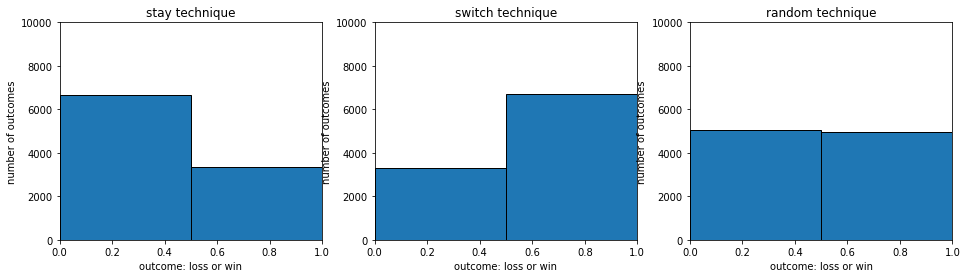

stay wins: 3333; switch wins: 6695; random wins: 4963


In [8]:
## Problem 3
#monty hall simulation and histogram

def stay(): #create a function that simulates staying with your initial pick
    #if your initial random guess matches initial random winning door, return true
    return np.random.randint(0,3) == np.random.randint(0,3)
    

def switch(): #create a function that simulates switching door choice
    doors=[False,False,False] #initialize boolean array of 3 doors
                              #false means door is not being used
    
    #winning door
    windoor=np.random.randint(0,3) #randomly generate winning door
    doors[windoor]=True #mark winning door as occupied in door array
    
    #your choice
    choice=np.random.randint(0,3) #randomly generate your initial pick
    doors[choice]=True #mark your door as occupied in door array
    
    #monty's pick
    falsedoors=[] #creates a list of avialable doors that monty can choose from
    for x in range(0,3): #checks all doors for availability
        if (doors[x]==False): #if door is not being used, save the door's index (x value) from doors[x]
            falsedoors.append(x)
    monty=falsedoors[np.random.randint(0,len(falsedoors))] #monty will randomly pick an available door from the list

    
    #switch door
    for x in range(0,3): #goes through all doors to find the door that's not your initial pick or monty's pick, then chooses it
        if (x!=monty) and (x!=choice):
            newdoor=x
            break #once you find the new door, end the loop
    
    return newdoor==windoor #returns true if your new pick is the winning door
    

win = [[],[],[]] #store wins and losses of staying technique (always keep initial pick)

for i in range(0,10000): #simulate 10000 games
    
    #run stay technique
    if stay()==True:
        win[0].append(1) #if you win add a 1 to winstay list
    else:
        win[0].append(0) #if you lose add a 0 to winstay list

    #run switch technique
    if switch()==True:
        win[1].append(1) #if you win add a 1 to winswitch list
    else:
        win[1].append(0)  #if you lose add a 0 to winswitch list

    #run random technique
    if (np.random.randint(0,2)==True): #randomly generate 1 or 0. if you roll 1, use stay technique
        if stay()==True: #if you win using stay add a 1 to winrand list
            win[2].append(1)
        else: #if you lose using stay add a 0 to winrand list
            win[2].append(0)
    else: #if you rolled 0, use switch technique
        if switch()==True: #if you win using switch add a 1 to winrand list
            win[2].append(1)
        else: #if you lose using switch add a 0 to winrand list
            win[2].append(0)

#create a histogram using the three lists that tracked wins and losses of each method and labels them
fig, ax = plt.subplots(1, 3,figsize=(16,4))

ax[0].hist(win[0],bins=2,ec='black')
ax[0].axis([0,1,0,10000]) #set x and y axis
ax[0].set_title('stay technique')

ax[1].hist(win[1],bins=2,ec='black')
ax[1].axis([0,1,0,10000]) #set x and y axis
ax[1].set_title('switch technique')

ax[2].hist(win[2],bins=2,ec='black')
ax[2].axis([0,1,0,10000]) #set x and y axis
ax[2].set_title('random technique')

#x labels
ax[0].set_xlabel('outcome: loss or win'), ax[1].set_xlabel('outcome: loss or win'), ax[2].set_xlabel('outcome: loss or win')
#y labels
ax[0].set_ylabel('number of outcomes'), ax[1].set_ylabel('number of outcomes'), ax[2].set_ylabel('number of outcomes')

plt.show()

#display number of wins for each technique
print('stay wins: ' + str(np.sum(win[0])) + ';','switch wins: ' + str(np.sum(win[1])) + ';','random wins: ' + str(np.sum(win[2])))